In [1]:
# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

# import additional modules
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from scipy.integrate import cumtrapz

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [2]:
# fixed parameters
q = 1             # mass ratio
a = 0.8           # spin magnitude
chi2 = [0, 0, 0]  # non-spinning BH configuration
t_ref = -100      # reference time (default for NRSur7dq4Remnant)
n = 2**8          # sample number  

In [3]:
path = 'datafiles/dolphin/'
thetas = np.loadtxt(path+'/theta_1')
phis = np.loadtxt(path+'/phi_1')
vs = np.loadtxt(path+'/vs')
max_asym = np.loadtxt(path+'/max_asym')

## Dolphin Plot

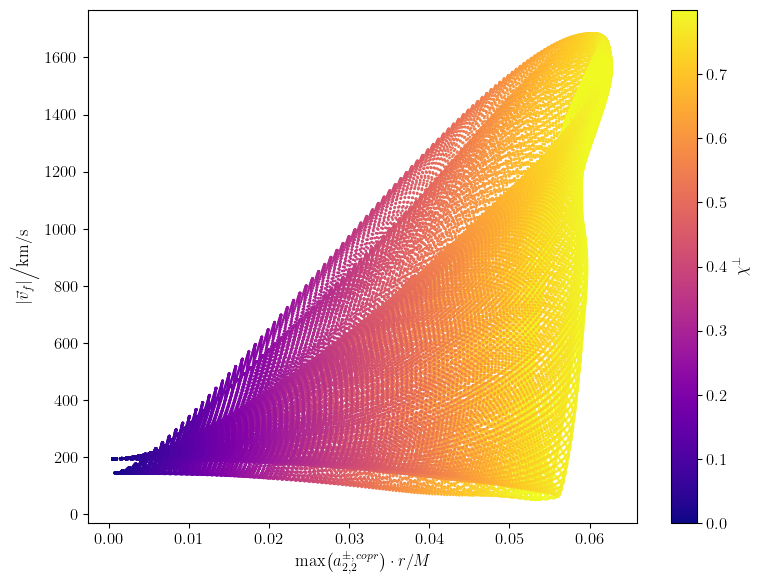

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

dim3 = np.sin(np.array(thetas))*a 

im = ax1.scatter(max_asym, vs, c=dim3, cmap='plasma', s=1, rasterized=True) # 'plasma' non-cyclic
ax1.set_xlabel(r'max$\big(a_{2,2}^{\pm,\,copr}\big)\cdot r/M$')
ax1.set_ylabel(r'$|\vec{v}_f|\Big/$km/s')
cbar = fig.colorbar(im,)
cbar.set_label(r'$\chi^\perp$')

fig.tight_layout()
plt.show()

## Find LKHA

In [5]:
v_boarder = 85
asym_boarder = 0.056

# get index of point in lower right corner
bool_v_indices = np.array(vs) <= v_boarder 
bool_asym_indices = np.array(max_asym) >= asym_boarder 
bool_v_asym_indices = bool_v_indices & bool_asym_indices
valid_indices_lkha = np.array(range(n**2))[bool_v_asym_indices]

# configuration of one of this LKHA configurations (0th one in index list)

t1 = thetas[valid_indices_lkha[0]]
p1 = phis[valid_indices_lkha[0]]

chi1x = a * np.sin(t1) * np.cos(p1)
chi1y = a * np.sin(t1) * np.sin(p1)
chi1z = a * np.cos(t1)
chi1_lkha = [chi1x, chi1y, chi1z]

t_ref = -100
f_ref = get_f_ref(q, chi1_lkha, chi2, t_ref)

# NRSur7dq4Remnant kick velocity in km/s
vf, vf_err = fit.vf(q, chi1_lkha, chi2) 
v_lkha = np.linalg.norm(vf)*3*10**5
v_z_lkha = vf[2]*3*10**5

# NRSur7dq4 (2,2) maximum of copr antisym waveform ampl
t, h_iner, dyn = sur(q, chi1_lkha, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
h_copr_lkha = modes_from_iner_to_new_frame(t, h_iner, 'coprecessing')
max_copr_22_asym_lkha = np.max(ampl_asym(h_copr_lkha, 2, 2))

print(chi1_lkha)
print(chi2)
print(v_lkha)
print(max_copr_22_asym_lkha)
print(v_z_lkha)

[0.7371494886176158, 0.2855732332825989, -0.12271332390294826]
[0, 0, 0]
83.5576938646608
0.056146626035125775
44.8243035600072


## Find HKHA

In [6]:
v_boarder = 1650
asym_boarder = 0.056

# get index of point in lower right corner
bool_v_indices = np.array(vs) <= v_boarder 
bool_asym_indices = np.array(max_asym) >= asym_boarder 
bool_v_asym_indices = bool_v_indices & bool_asym_indices
valid_indices_hkha = np.array(range(n**2))[bool_v_asym_indices]

# configuration of one of this hkha configurations (0th one in index list)

t1 = thetas[valid_indices_hkha[0]]
p1 = phis[valid_indices_hkha[0]]

chi1x = a * np.sin(t1) * np.cos(p1)
chi1y = a * np.sin(t1) * np.sin(p1)
chi1z = a * np.cos(t1)
chi1_hkha = [chi1x, chi1y, chi1z]

t_ref = -100
f_ref = get_f_ref(q, chi1_hkha, chi2, t_ref)

# NRSur7dq4Remnant kick velocity in km/s
vf, vf_err = fit.vf(q, chi1_hkha, chi2) 
v_hkha = np.linalg.norm(vf)*3*10**5
v_z_hkha = vf[2]*3*10**5

# NRSur7dq4 (2,2) maximum of copr antisym waveform ampl
t, h_iner, dyn = sur(q, chi1_hkha, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
h_copr_hkha = modes_from_iner_to_new_frame(t, h_iner, 'coprecessing')
h_coro = modes_from_iner_to_new_frame(t, h_iner, 'corotating')
max_copr_22_asym_hkha = np.max(ampl_asym(h_copr_hkha, 2, 2))

print(chi1_hkha)
print(chi2)
print(v_hkha)
print(max_copr_22_asym_hkha)
print(v_z_hkha)

[0.31686915052382547, -0.5989076693543155, 0.4253275738003489]
[0, 0, 0]
1629.2621658042906
0.05601119197339145
1577.5704196012068


## Master formula

In [7]:
# master formula at t_ref = -100 M in copr frame

def master_eq(q, chi1, chi2):
    
    # calculate surrogate waveform 
    t_ref = -100
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref) 
    h_copr = modes_from_iner_to_new_frame(t, h, 'coprecessing')
    
    # calculate +/- quantities
    a_a = ampl_asym(h_copr, 2, 2)
    phi_a = phi_asym(h_copr, 2, 2)
    a_s = ampl_sym(h_copr, 2, 2)
    phi_s = phi_sym(h_copr, 2, 2)
    
    # calculate derivates of +/- quantities
    a_a_dot = np.diff(a_a) / dt
    a_a_dot = np.append(a_a_dot[0], a_a_dot)
    phi_a_dot = np.diff(phi_a) / dt 
    phi_a_dot = np.append(phi_a_dot[0], phi_a_dot)
    a_s_dot = np.diff(a_s) / dt 
    a_s_dot = np.append(a_s_dot[0], a_s_dot)
    phi_s_dot = np.diff(phi_s) / dt 
    phi_s_dot = np.append(phi_s_dot[0], phi_s_dot)
    
    # Shrobana master eq. and integration
    term1 = (a_a_dot*a_s_dot + a_a*a_s*phi_a_dot*phi_s_dot)*np.cos(phi_a - phi_s)
    term2 = - (a_a*a_s_dot*phi_a_dot - a_a_dot*a_s*phi_s_dot)*np.sin(phi_a - phi_s) 
    dPzdt = 1/(6*np.pi) * (term1 + term2)
    Pz = simps(dPzdt, dx=dt)
    Pzt = cumtrapz(dPzdt, t, initial=0)
    
    return t, a_a, phi_a, a_s, phi_s, a_a_dot, a_s_dot, phi_a_dot, phi_s_dot, term1, term2, dPzdt, Pz, Pzt

In [8]:
# LKHA
t_lkha, a_a_lkha, phi_a_lkha, a_s_lkha, phi_s_lkha, a_a_dot_lkha, a_s_dot_lkha, phi_a_dot_lkha, phi_s_dot_lkha, term1_lkha, term2_lkha, dPzdt_lkha, Pz_lkha, Pzt_lkha = master_eq(q, chi1_lkha, chi2)


In [9]:
# HKHA
t_hkha, a_a_hkha, phi_a_hkha, a_s_hkha, phi_s_hkha, a_a_dot_hkha, a_s_dot_hkha, phi_a_dot_hkha, phi_s_dot_hkha, term1_hkha, term2_hkha, dPzdt_hkha, Pz_hkha, Pzt_hkha = master_eq(q, chi1_hkha, chi2)


## Plot Real Part and kick profile

In [10]:
size = 22

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

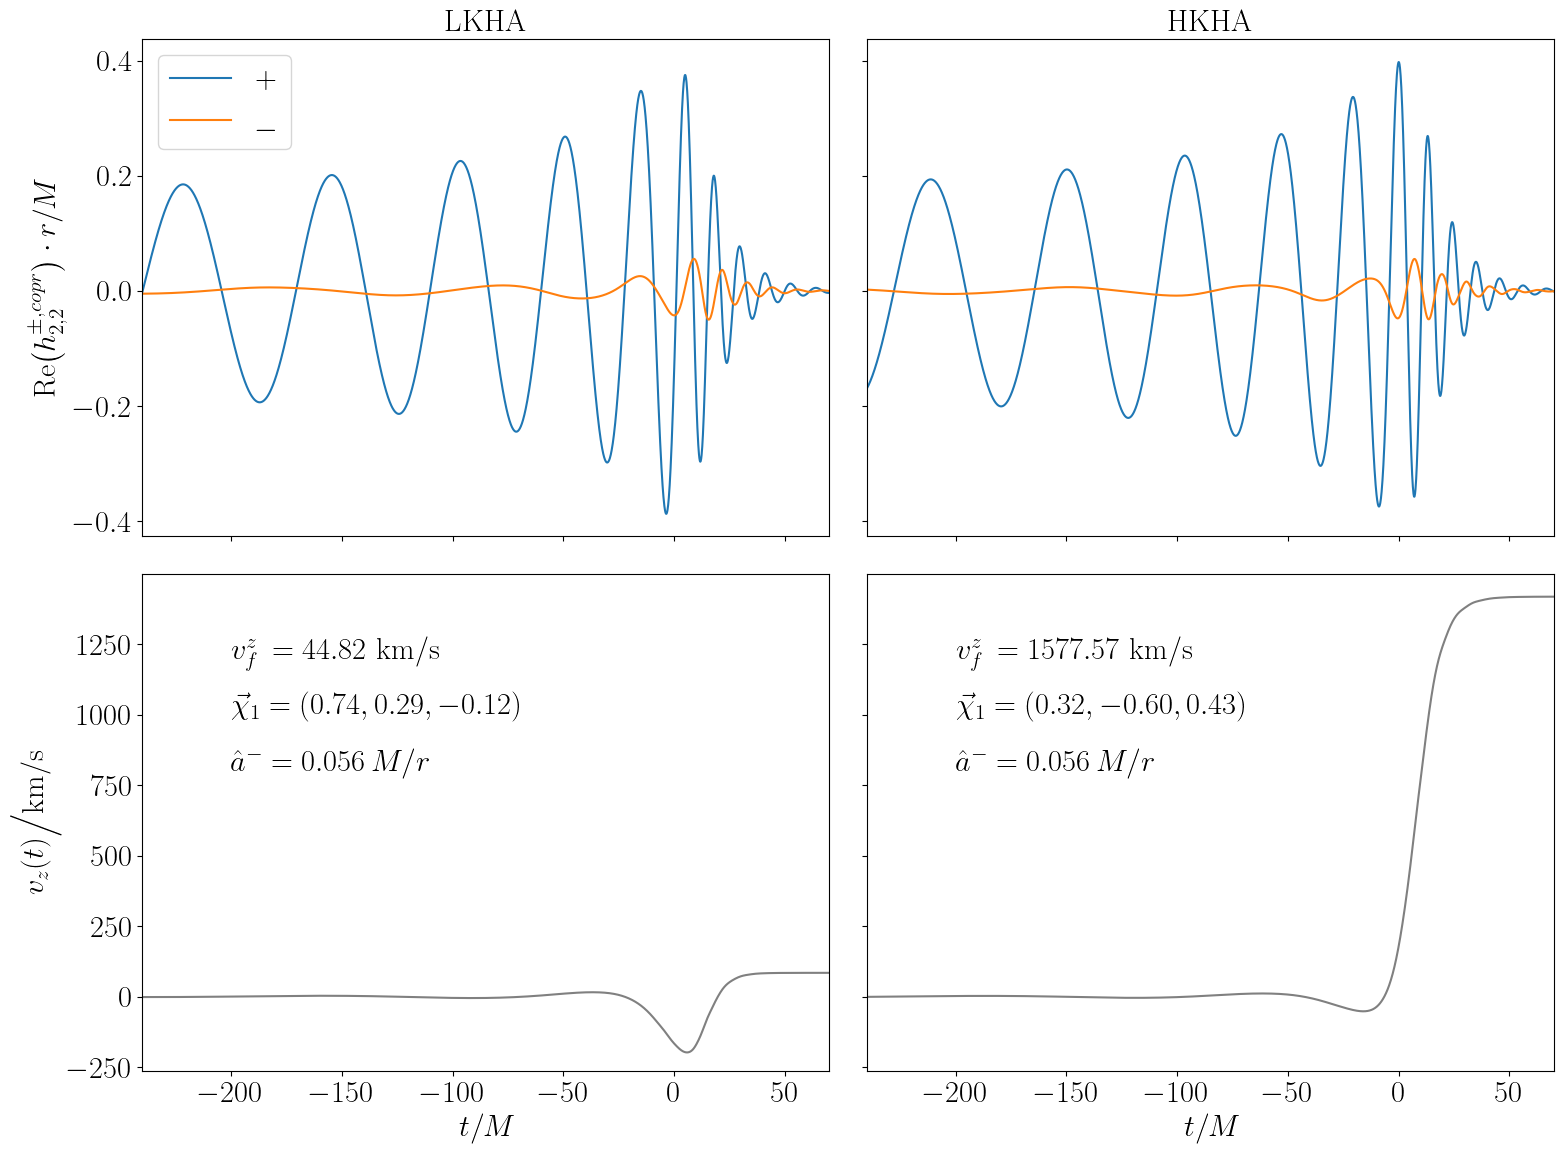

In [11]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1) 
ax3 = fig.add_subplot(223,sharex=ax1)
ax4 = fig.add_subplot(224, sharey=ax3, sharex=ax2) 

ax1.plot(t, np.real(h_sym(h_copr_lkha,2,2)), label='$+$')
ax1.plot(t, np.real(h_asym(h_copr_lkha,2,2)), label='$-$')
ax1.set_ylabel(r'Re$\big(h_{2,2}^{\pm,copr}\big) \cdot r/M$')
ax1.legend(loc='upper left')
ax1.set_xlim(-250,70)
ax1.set_title('LKHA')
ax1.tick_params('x', labelbottom=False)

ax2.plot(t, np.real(h_sym(h_copr_hkha,2,2)))
ax2.plot(t, np.real(h_asym(h_copr_hkha,2,2)))
ax2.set_xlim(-240,70)
ax2.set_title('HKHA')
ax2.tick_params('y', labelleft=False)
ax2.tick_params('x', labelbottom=False)

ax3.plot(t, -Pzt_lkha*3*10**5, color='grey')
ax3.set_ylabel(r'$v_z(t)\Big/$km/s')
ax3.set_xlabel(r'$t/M$')
ax3.set_xlim(-240,70)
ax3.set_ylim(-265,1499)
ax3.text(-200, 1200, r'$v^z_f \,= %.2f$ km/s' %v_z_lkha) 
chi1_lkha_x, chi1_lkha_y, chi1_lkha_z = chi1_lkha
ax3.text(-200, 1000, r'$\vec{\chi}_1 = (%.2f, %.2f, %.2f)$' %(chi1_lkha_x, chi1_lkha_y, chi1_lkha_z))
ax3.text(-200, 800, r'$\hat{a}^- = %.3f \, M/r$' %max_copr_22_asym_lkha)

ax4.plot(t, -Pzt_hkha*3*10**5, color='grey')
ax4.set_xlabel(r'$t/M$')
ax4.set_xlim(-240,70)
ax4.tick_params('y', labelleft=False)
ax4.text(-200, 1200, r'$v^z_f \,= %.2f$ km/s' %v_z_hkha) 
chi1_hkha_x, chi1_hkha_y, chi1_hkha_z = chi1_hkha
ax4.text(-200, 1000, r'$\vec{\chi}_1 = (%.2f, %.2f, %.2f)$' %(chi1_hkha_x, chi1_hkha_y, chi1_hkha_z))
ax4.text(-200, 800, r'$\hat{a}^- = %.3f \, M/r$' %max_copr_22_asym_hkha)

fig.tight_layout()
#fig.savefig('strain_L_HKHA.pdf')
plt.show()

### Analysis momentum flux of LKHA and HKHA

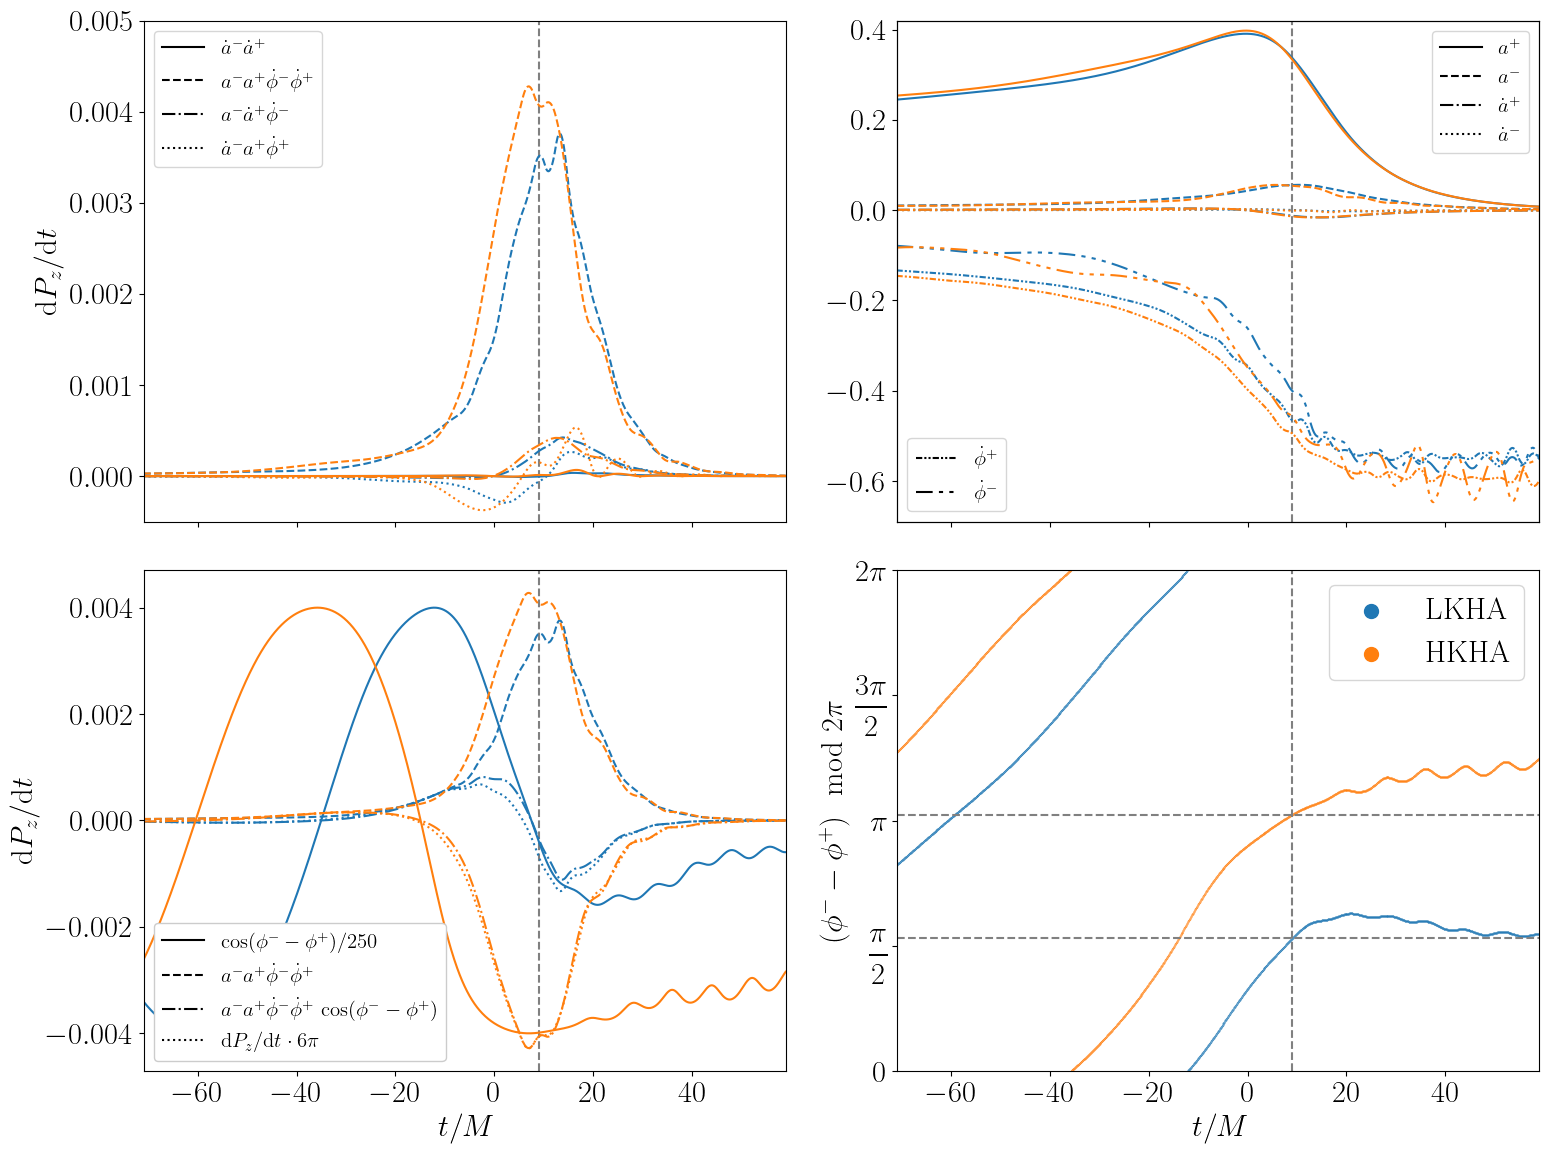

In [12]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharex=ax1) 
ax3 = fig.add_subplot(223, sharex=ax1)
ax4 = fig.add_subplot(224, sharex=ax1) 

axr = ax2.twinx() 
axr.set_ylim(-.69, .42)
axr.tick_params('y', labelright=False)
axr.set_yticks([])
#axr.set_ylabel(r'$\dot{\phi}^\pm \cdot M/$rad')


# vertical and horizontal grey lines
t_max = 9 
imax = np.argmin(np.abs(t - t_max))
ax1.axvline(t_max, color='grey', linestyle='--') 
ax2.axvline(t_max, color='grey', linestyle='--') 
ax3.axvline(t_max, color='grey', linestyle='--') 
ax4.axvline(t_max, color='grey', linestyle='--') 
ax4.axhline(((phi_a_lkha - phi_s_lkha) % (2*np.pi))[imax], color='grey', linestyle='--')
ax4.axhline(((phi_a_hkha - phi_s_hkha) % (2*np.pi))[imax], color='grey', linestyle='--')

ax1.plot(t, a_a_dot_lkha*a_s_dot_lkha, color='tab:blue', 
         label=r'$\dot{a}^- \dot{a}^+$')
ax1.plot(t, a_a_lkha*a_s_lkha*phi_a_dot_lkha*phi_s_dot_lkha, '--', color='tab:blue', 
         label=r'$a^- a^+ \dot{\phi}^- \dot{\phi}^+$')
ax1.plot(t, a_a_lkha*a_s_dot_lkha*phi_a_dot_lkha, '-.', color='tab:blue', 
         label=r'$a^- \dot{a}^+ \dot{\phi}^-$')
ax1.plot(t, a_a_dot_lkha*a_s_lkha*phi_s_dot_lkha, ':', color='tab:blue', 
         label=r'$\dot{a}^- a^+ \dot{\phi}^+$')
ax1.plot(t, a_a_dot_hkha*a_s_dot_hkha, color='tab:orange')
ax1.plot(t, a_a_hkha*a_s_hkha*phi_a_dot_hkha*phi_s_dot_hkha, '--', color='tab:orange')
ax1.plot(t, a_a_hkha*a_s_dot_hkha*phi_a_dot_hkha, '-.', color='tab:orange')
ax1.plot(t, a_a_dot_hkha*a_s_hkha*phi_s_dot_hkha, ':', color='tab:orange')
ax1.tick_params('x', labelbottom=False)

axr.plot(t, phi_s_dot_lkha, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='tab:blue')
axr.plot(t, phi_a_dot_lkha, dashes=[8, 3, 2, 3, 2, 3, 2, 3], color='tab:blue')
ax2.plot(t, a_s_lkha, color='tab:blue', label=r'$a^+$')
ax2.plot(t, a_a_lkha, '--', color='tab:blue', label=r'$a^-$')
ax2.plot(t, a_s_dot_lkha, '-.', color='tab:blue', label=r'$\dot{a}^+$')
ax2.plot(t, a_a_dot_lkha, ':', color='tab:blue', label=r'$\dot{a}^-$')

axr.plot(t, phi_s_dot_hkha, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='tab:orange', 
         label=r'$\dot{\phi}^+$')
axr.plot(t, phi_a_dot_hkha, dashes=[8, 3, 2, 3, 2, 3, 2,3], color='tab:orange', 
         label=r'$\dot{\phi}^-$')
ax2.plot(t, a_s_hkha, color='tab:orange')
ax2.plot(t, a_a_hkha, '--', color='tab:orange')
ax2.plot(t, a_s_dot_hkha, '-.', color='tab:orange')
ax2.plot(t, a_a_dot_hkha, ':', color='tab:orange')
ax2.tick_params('x', labelbottom=False)

scale_cos = 1/250
ax3.plot(t, np.cos(phi_a_lkha-phi_s_lkha)*scale_cos, color='tab:blue', 
         label=r'$\cos(\phi^- - \phi^+) /250$' )
ax3.plot(t, a_a_lkha*a_s_lkha*phi_a_dot_lkha*phi_s_dot_lkha, '--', color='tab:blue', 
         label=r'$a^- a^+ \dot{\phi}^- \dot{\phi}^+$')
ax3.plot(t, a_a_lkha*a_s_lkha*phi_a_dot_lkha*phi_s_dot_lkha*np.cos(phi_a_lkha-phi_s_lkha), '-.', color='tab:blue',
        label=r'$a^- a^+ \dot{\phi}^- \dot{\phi}^+ \, \cos (\phi^- - \phi^+)$')
ax3.plot(t, 6*np.pi*dPzdt_lkha, ':', color='tab:blue',
         label=r'$\mathrm{d}P_z/\mathrm{d}t \cdot 6\pi$')
ax3.plot(t, np.cos(phi_a_hkha-phi_s_hkha)*scale_cos, color='tab:orange')
ax3.plot(t, a_a_hkha*a_s_hkha*phi_a_dot_hkha*phi_s_dot_hkha, '--', color='tab:orange')
ax3.plot(t, a_a_hkha*a_s_hkha*phi_a_dot_hkha*phi_s_dot_hkha*np.cos(phi_a_hkha-phi_s_hkha), '-.', color='tab:orange')
ax3.plot(t, 6*np.pi*dPzdt_hkha, ':', color='tab:orange')

ax4.scatter(t, (phi_a_lkha-phi_s_lkha) % (2*np.pi), color='tab:blue', s=.1, label='LKHA')
ax4.scatter(t, (phi_a_hkha-phi_s_hkha) % (2*np.pi), color='tab:orange', s=.1, label='HKHA')
   
ax1.set_ylabel(r'$\mathrm{d}P_z/\mathrm{d}t$')
ax1.set_xlim(-71,59)
ax1.set_ylim(-0.0005, 0.005)
ax1.legend(fontsize=15,loc='upper left')
leg = ax1.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')

ax2.legend(fontsize=15)
#ax2.set_ylabel(r'$a^\pm \cdot r/M$')
ax2.set_ylim(-.69, .42)
leg = ax2.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')

axr.legend(fontsize=15, loc='lower left')
leg = axr.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

ax3.set_ylabel(r'$\mathrm{d}P_z/\mathrm{d}t$')
ax3.legend(loc='lower left',fontsize=15, framealpha=1)
ax3.set_xlabel(r'$t/M$')
leg = ax3.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
leg.legendHandles[2].set_color('black')
leg.legendHandles[3].set_color('black')

ax4.set_yticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\dfrac{\pi}{2}$',r'$\pi$',r'$\dfrac{3\pi}{2}$',r'$2\pi$'])
ax4.set_ylabel(r'$(\phi^- - \phi^+) \mod 2\pi$')
ax4.set_xlabel(r'$t/M$')
ax4.set_xlabel(r'$t/M$')
ax4.set_ylim(0,2*np.pi)
ax4.legend()
leg = ax4.get_legend()
leg.legendHandles[0].set_sizes([100])
leg.legendHandles[1].set_sizes([100])


fig.tight_layout()
#fig.savefig('terms_L_HKHA.pdf')
plt.show()